In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [25]:
file_path = './CC_preprocessed.csv'

In [26]:
data=pd.read_csv(file_path)
data=data.drop([data.columns[0]],axis=1)

In [27]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.784577,0.818182,-0.649794,-0.621380,-0.479334,-0.610964,0.166667,0.000000,0.083333,0.000000,-0.476070,-0.511333,-0.964944,-0.782590,-0.691893,0.000000,0.36068
1,0.894892,0.909091,-0.733178,-0.621380,-0.664586,2.761295,0.000000,0.000000,0.000000,0.250000,0.110074,-0.591796,0.693782,1.580002,0.640026,0.222222,0.36068
2,0.519154,1.000000,-0.057386,0.501997,-0.664586,-0.610964,1.000000,1.000000,0.000000,0.000000,-0.476070,-0.109020,0.832010,-0.528077,0.004565,0.000000,0.36068
3,0.079055,0.636364,0.577029,1.556591,-0.664586,-0.455200,0.083333,0.083333,0.000000,0.083333,-0.329534,-0.551565,0.832010,-0.904802,-0.445116,0.000000,0.36068
4,-0.371922,1.000000,-0.719193,-0.598132,-0.664586,-0.610964,0.083333,0.083333,0.000000,0.000000,-0.476070,-0.551565,-0.909653,-0.494001,-0.541569,0.000000,0.36068


No Kernel

In [28]:
results={}

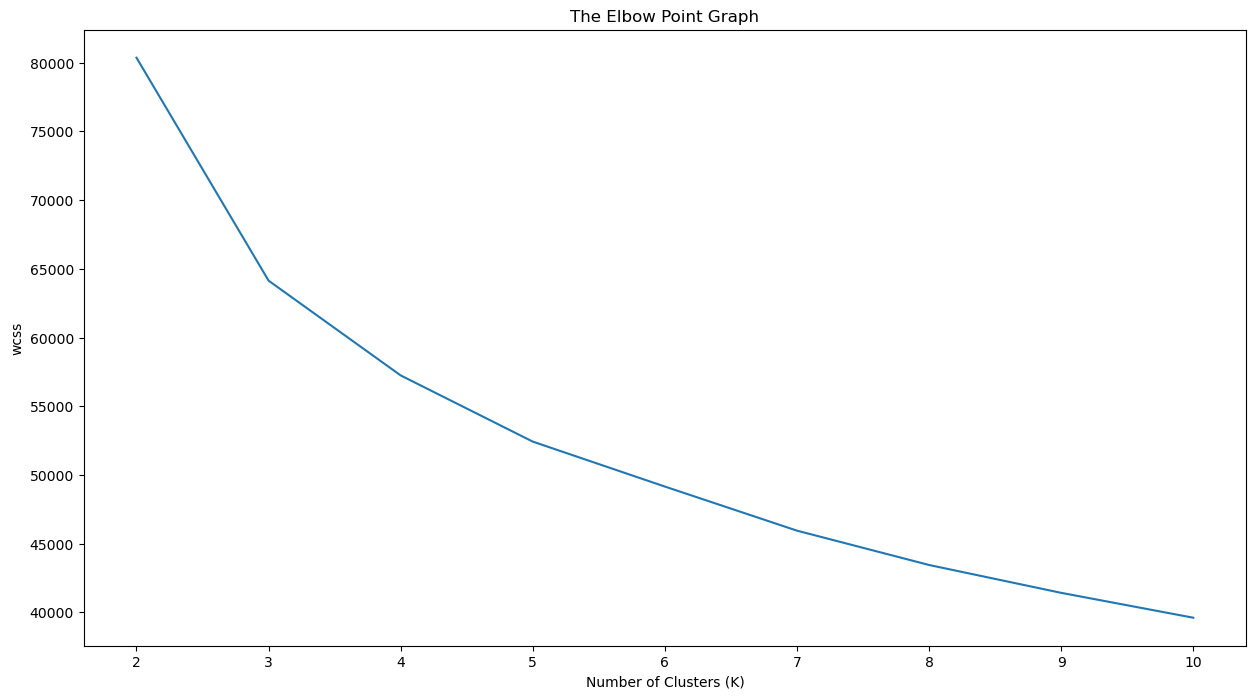

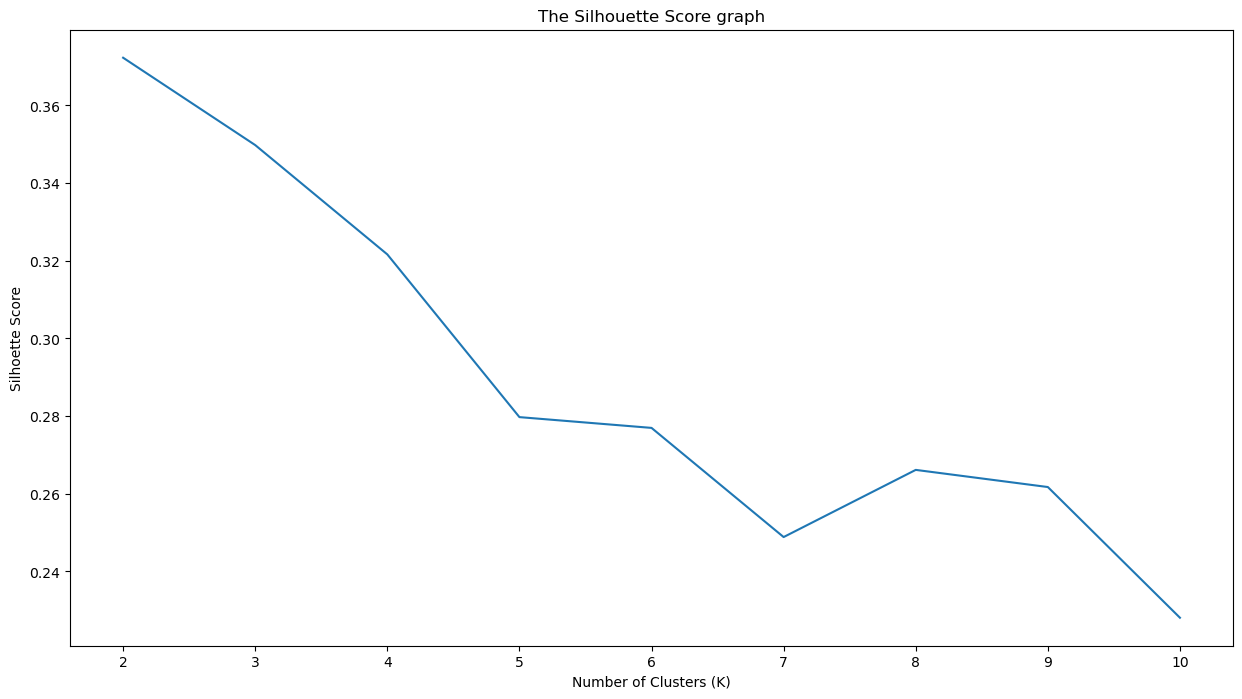

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss=[]
silhouettes=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, n_init=10,init='k-means++', random_state=2)
  kmeans.fit(data)
  silhouette_avg = silhouette_score(data, kmeans.labels_)
  silhouettes.append(silhouette_avg)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(2,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.show()


plt.figure(figsize=(15,8))
plt.plot(range(2,11), silhouettes)
plt.title('The Silhouette Score graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhoette Score')
plt.show()


In [30]:
results["No_kernel"]={"wcss":wcss,"silhouette":silhouettes}

In [31]:
results

{'No_kernel': {'wcss': [80359.32088734256,
   64137.72951002722,
   57241.238244755856,
   52424.478814490554,
   49154.52663213866,
   45945.874436543265,
   43447.467670933154,
   41420.62748760679,
   39610.77017813057],
  'silhouette': [0.37228121792944624,
   0.3497879038975747,
   0.3216391894517862,
   0.27974436044330536,
   0.27697068472185465,
   0.24886321992323251,
   0.26615830436365867,
   0.2617427875154651,
   0.22809455198832337]}}

3 clusters optimal

In [32]:
data_original=pd.read_csv('./CC_GENERAL.csv')
data_original

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [33]:
data_analysis=data_original[['BALANCE','CREDIT_LIMIT']]
data_analysis=data_analysis.fillna(data_analysis.median())

In [34]:
data_analysis.isna().sum()


BALANCE         0
CREDIT_LIMIT    0
dtype: int64

In [35]:
X=data.to_numpy()

In [36]:
kmeans_opt=KMeans(n_clusters=3, n_init=10,init='k-means++', random_state=2)
kmeans_opt.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=2)

In [37]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.784577,0.818182,-0.649794,-0.621380,-0.479334,-0.610964,0.166667,0.000000,0.083333,0.000000,-0.476070,-0.511333,-0.964944,-0.782590,-0.691893,0.000000,0.360680
1,0.894892,0.909091,-0.733178,-0.621380,-0.664586,2.761295,0.000000,0.000000,0.000000,0.250000,0.110074,-0.591796,0.693782,1.580002,0.640026,0.222222,0.360680
2,0.519154,1.000000,-0.057386,0.501997,-0.664586,-0.610964,1.000000,1.000000,0.000000,0.000000,-0.476070,-0.109020,0.832010,-0.528077,0.004565,0.000000,0.360680
3,0.079055,0.636364,0.577029,1.556591,-0.664586,-0.455200,0.083333,0.083333,0.000000,0.083333,-0.329534,-0.551565,0.832010,-0.904802,-0.445116,0.000000,0.360680
4,-0.371922,1.000000,-0.719193,-0.598132,-0.664586,-0.610964,0.083333,0.083333,0.000000,0.000000,-0.476070,-0.551565,-0.909653,-0.494001,-0.541569,0.000000,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.791168,1.000000,-0.478724,-0.621380,-0.099276,-0.610964,1.000000,0.000000,0.833333,0.000000,-0.476070,-0.350408,-0.964944,-0.707622,-0.821287,0.500000,-4.122768
8946,-0.796113,1.000000,-0.470962,-0.621380,-0.082032,-0.610964,1.000000,0.000000,0.833333,0.000000,-0.476070,-0.350408,-0.964944,-0.737740,-0.445116,0.000000,-4.122768
8947,-0.793874,0.833333,-0.606965,-0.621380,-0.384184,-0.610964,0.833333,0.000000,0.666667,0.000000,-0.476070,-0.390639,-0.964944,-0.855584,-0.773409,0.250000,-4.122768
8948,-0.799155,0.833333,-0.733178,-0.621380,-0.664586,-0.583292,0.000000,0.000000,0.000000,0.166667,-0.182998,-0.591796,-1.103171,-0.872978,-0.811479,0.250000,-4.122768


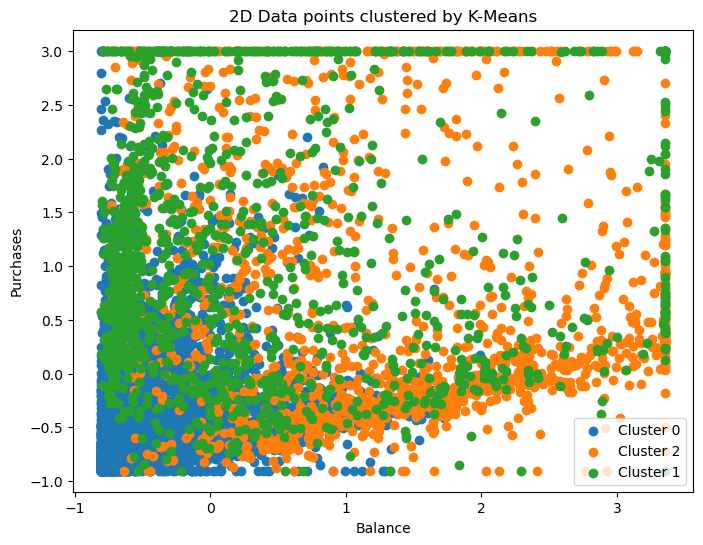

In [38]:
kmeans_opt=KMeans(n_clusters=3, n_init=10,init='k-means++', random_state=42)
kmeans_opt.fit(X)

data['ClusterLabel']=kmeans_opt.labels_
plt.figure(figsize=(8, 6))
for label in data['ClusterLabel'].unique():
    # Filter the data based on the label
    cluster_data = data[data['ClusterLabel'] == label]
    plt.scatter(cluster_data['BALANCE'], cluster_data['PAYMENTS'], label=f'Cluster {label}')

plt.title('2D Data points clustered by K-Means')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.legend()
plt.show()

Using different Kernel methods

In [39]:
X=data.to_numpy()

In [40]:
def polynomial_kernel(X1,X2,degree=1,c=1,sigma=1.0,alpha=1.0,d=0.0):
  dot_product = np.dot(X1, X2)
  kernel_value = (dot_product + c) ** degree
  return kernel_value

def gaussian_kernel(X1,X2,degree=1,c=1,sigma=1.0,alpha=1.0,d=0.0):
  sq_distance = np.sum((X1-X2) ** 2)
  kernel_value = np.exp(-sq_distance / (2 * sigma ** 2))
  return kernel_value

def tanh_kernel(X1,X2,degree=1,c=1,sigma=1.0,alpha=1.0,d=0.0):
  dot_product = np.dot(X1, X2)
  kernel_value = np.tanh(alpha * dot_product + d)
  return kernel_value

def euclidean_distance_func(X1,X2,degree=1,c=1,sigma=1.0,alpha=1.0,d=0.0):
  return np.sum((X1-X2)**2)



In [41]:
class custom_kmeans:
  def __init__(self,n_clusters,kernel="gaussian",degree=1.0,c=1,sigma=1.0,alpha=1.0,d=0.0,max_iters=100):
    self.n_clusters = n_clusters
    self.max_iters = max_iters
    self.degree=degree
    self.c=c
    self.sigma=sigma
    self.alpha=alpha
    self.d=d
    self.dist=gaussian_kernel
    self.kernel=kernel
    if kernel=="gaussian":
      self.dist=gaussian_kernel
    elif kernel=="polynomial":
      self.dist=polynomial_kernel
    elif kernel=="tanh":
      self.dist=tanh_kernel
    elif kernel=="euclidean":
      self.dist=euclidean_distance_func

  def fit(self,X):
    self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
    for _ in range(self.max_iters):
      labels = self._assign_labels(X)
      new_centroids = self._update_centroids(X, labels)
      if np.all(self.centroids == new_centroids):
          break

      self.centroids = new_centroids

  def _assign_labels(self,X):
    distances = np.zeros((X.shape[0], self.centroids.shape[0]))

    for i in range(X.shape[0]):
        for j in range(self.centroids.shape[0]):
            distances[i, j] = self.dist(X[i], X[i],degree=self.degree,c=self.c,sigma=self.sigma,alpha=self.alpha,d=self.d)-2*self.dist(X[i], self.centroids[j],degree=self.degree,c=self.c,sigma=self.sigma,alpha=self.alpha,d=self.d)+self.dist(self.centroids[j], self.centroids[j],degree=self.degree,c=self.c,sigma=self.sigma,alpha=self.alpha,d=self.d)


    return np.argmin(distances, axis=1)

  def _update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

  def calculate_wcss(self, X, labels):
    wcss = 0
    for i in range(self.n_clusters):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            wcss += np.sum((cluster_points - self.centroids[i])**2)
    return wcss

  def calculate_silhouette(self,X,labels):
    return silhouette_score(X, labels)




Polynomial Kernel

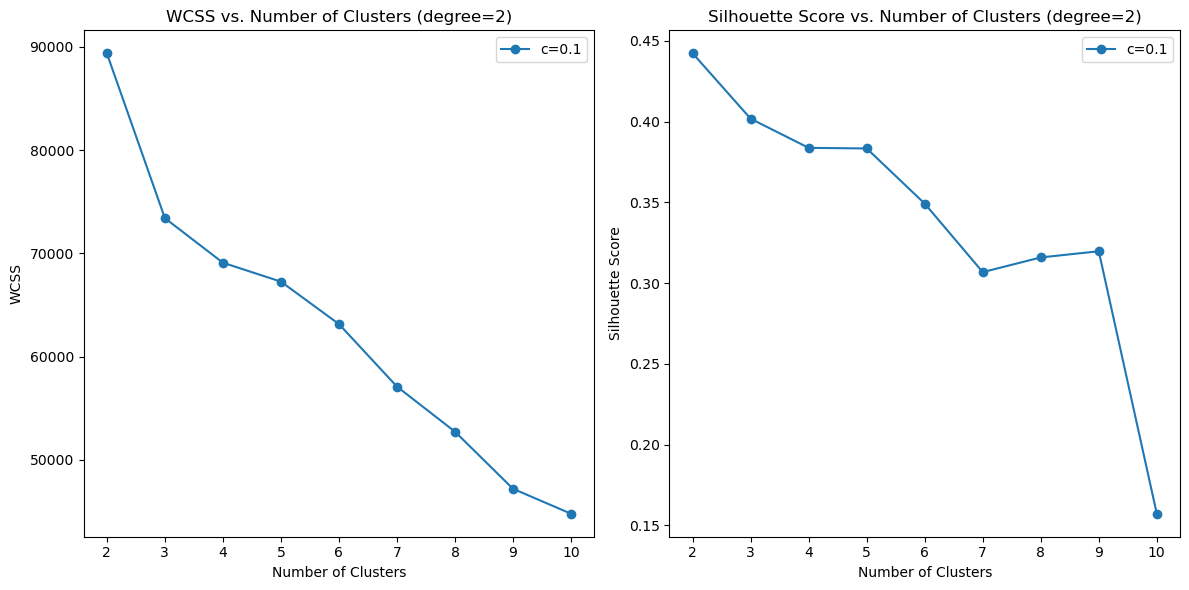

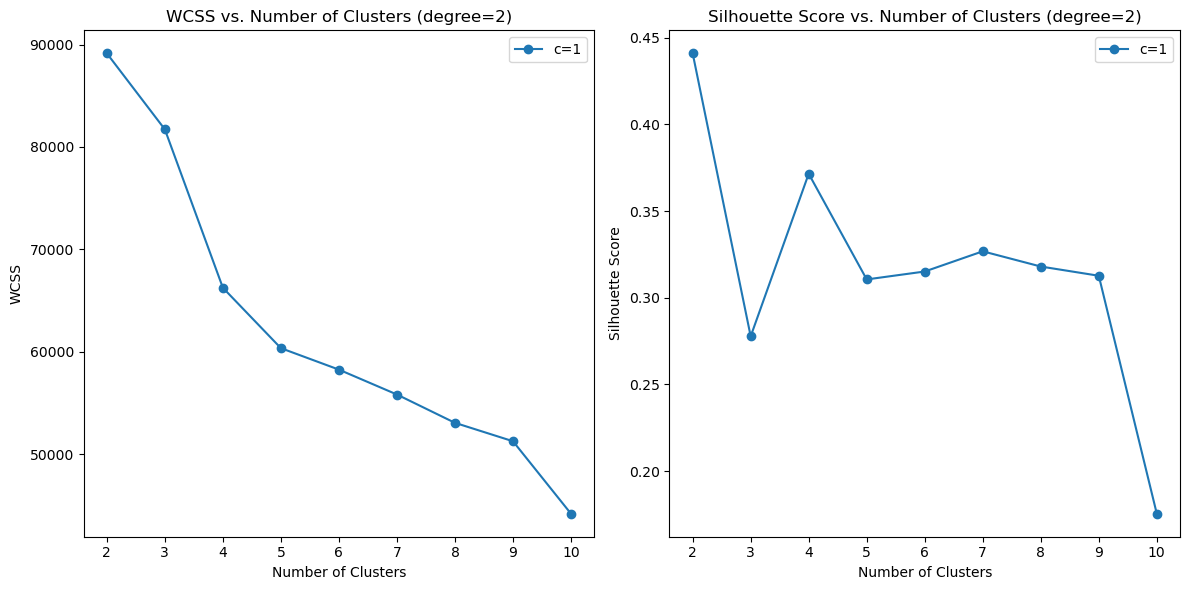

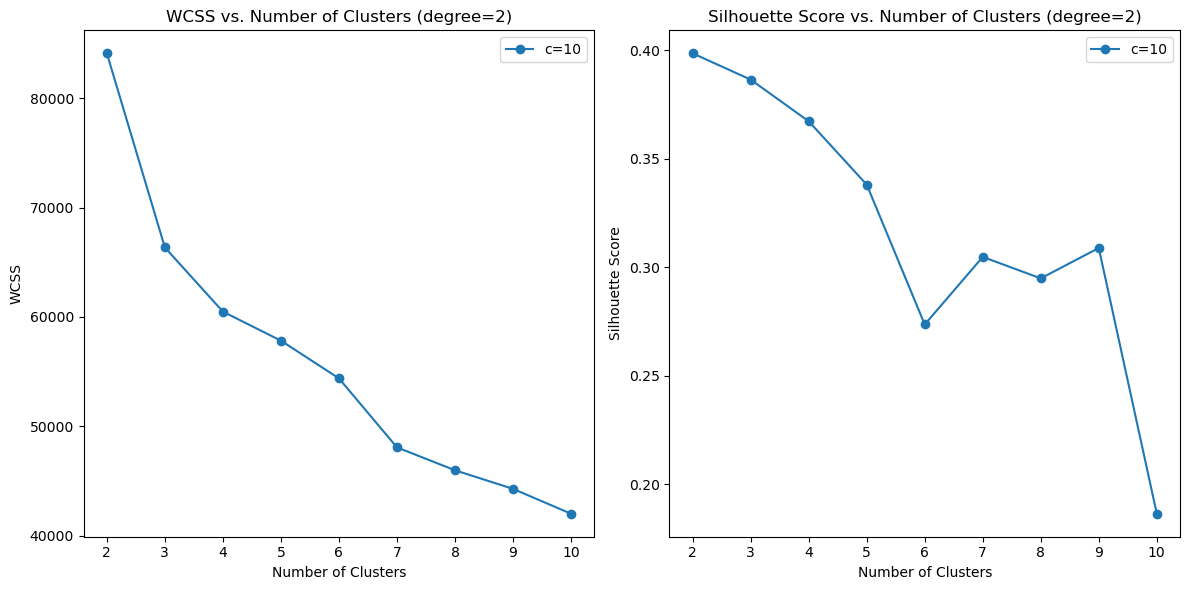

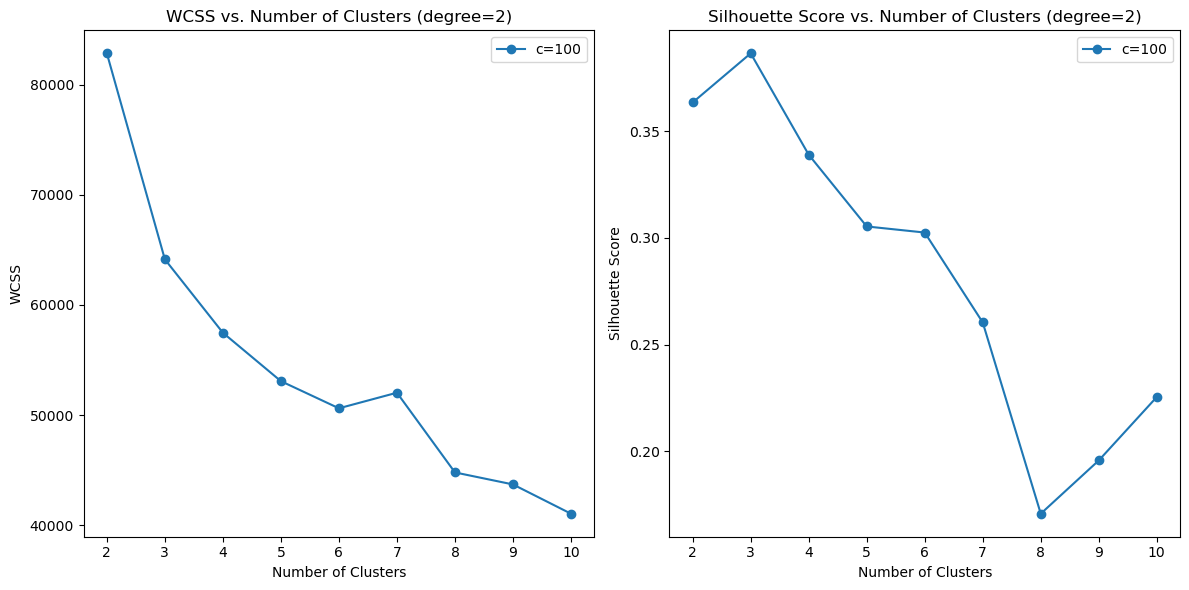

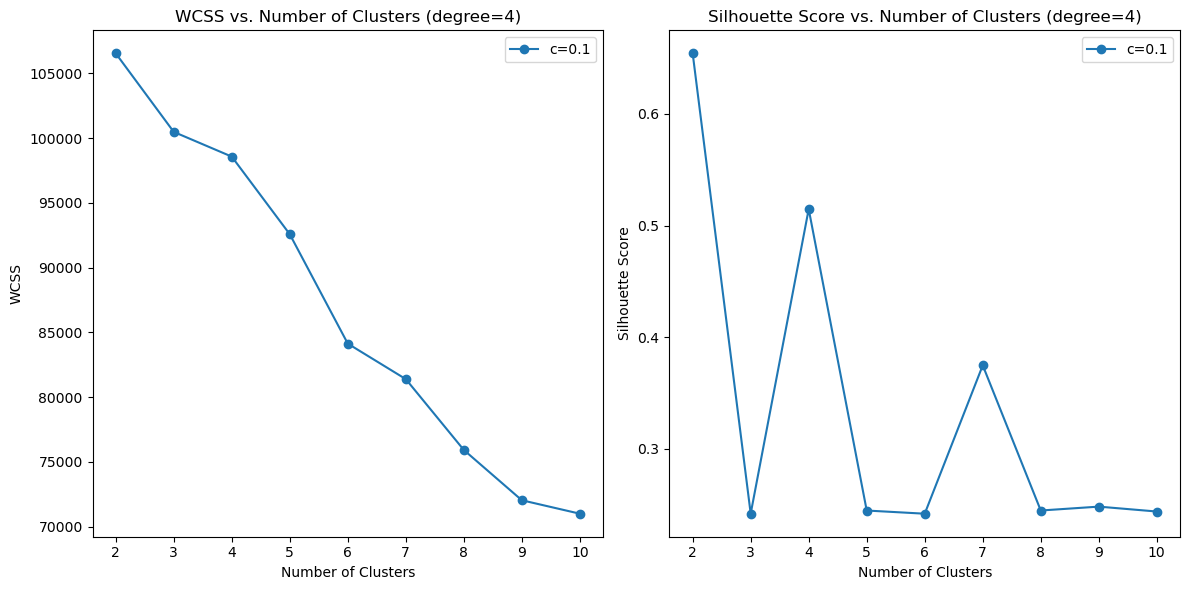

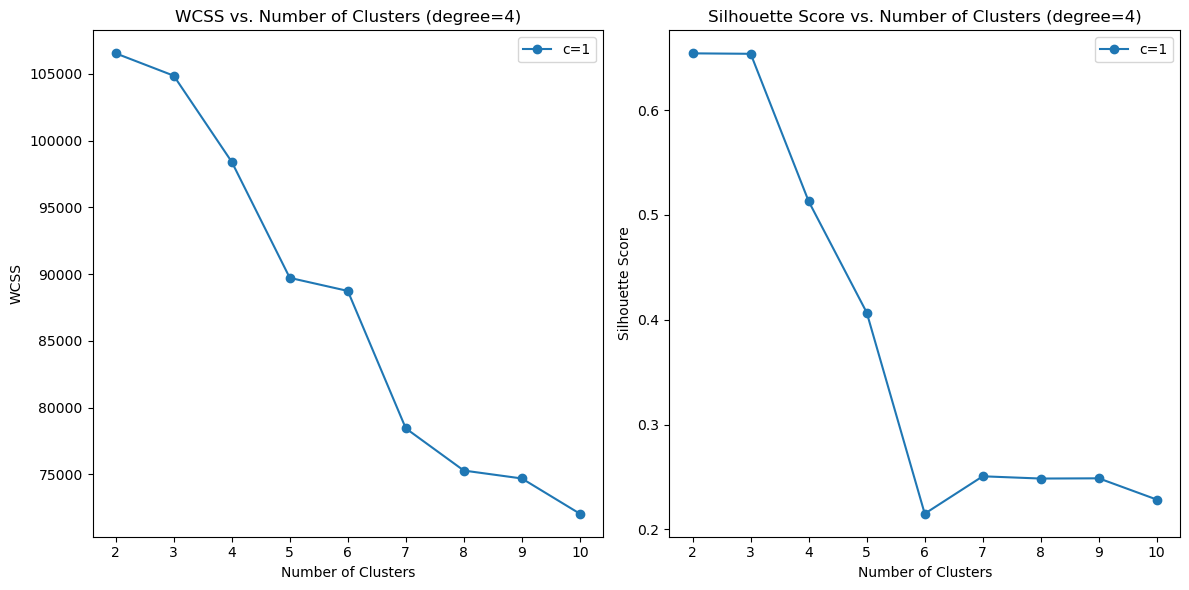

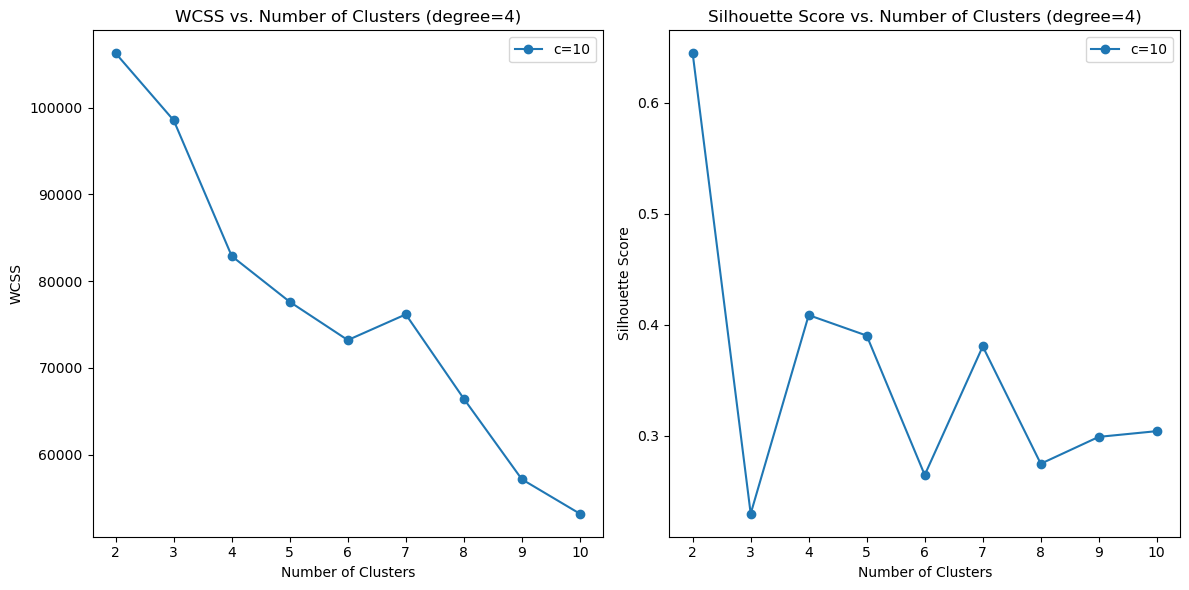

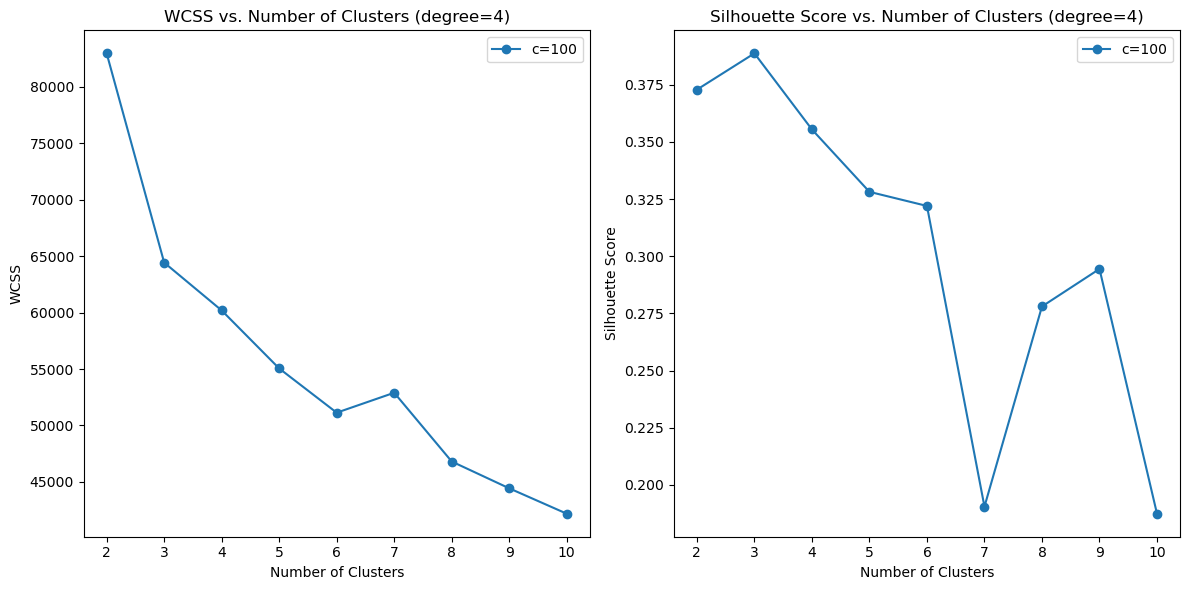

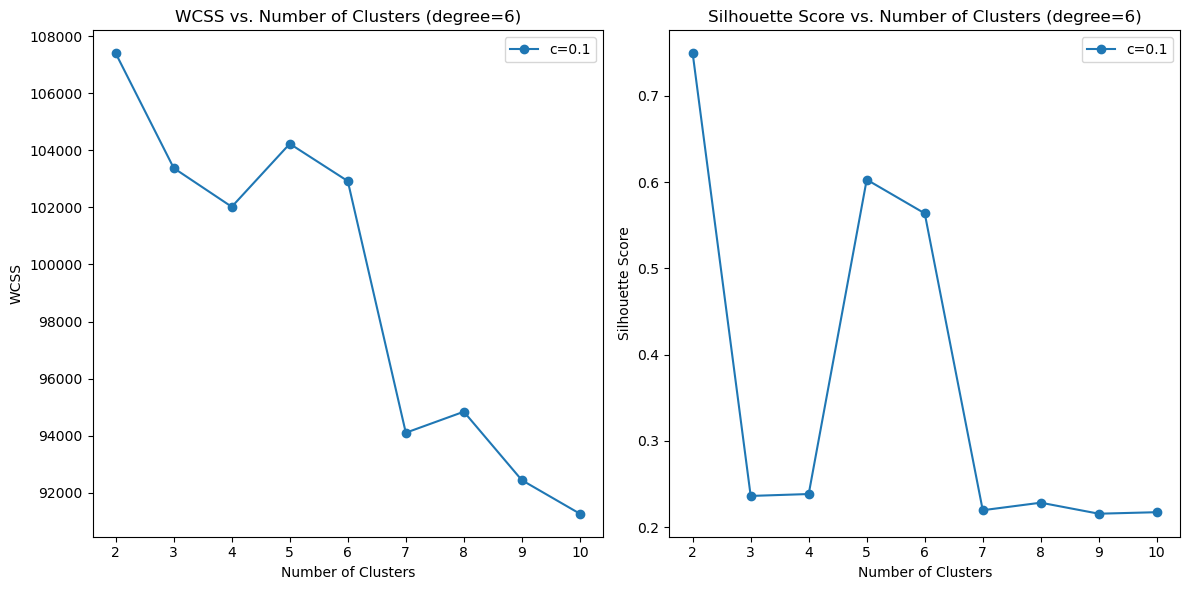

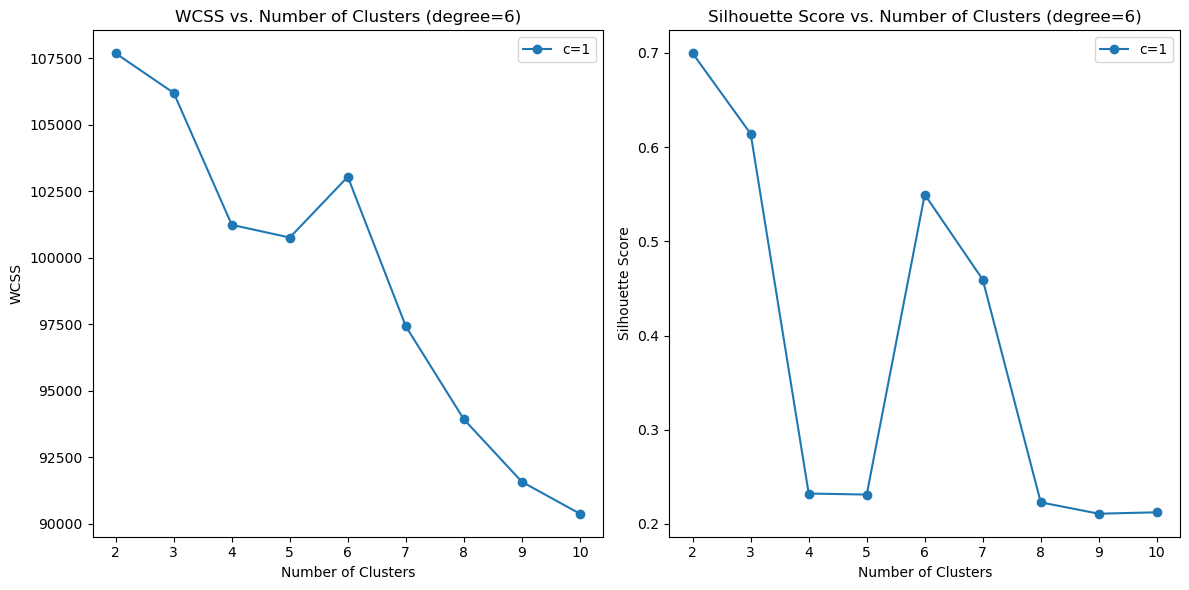

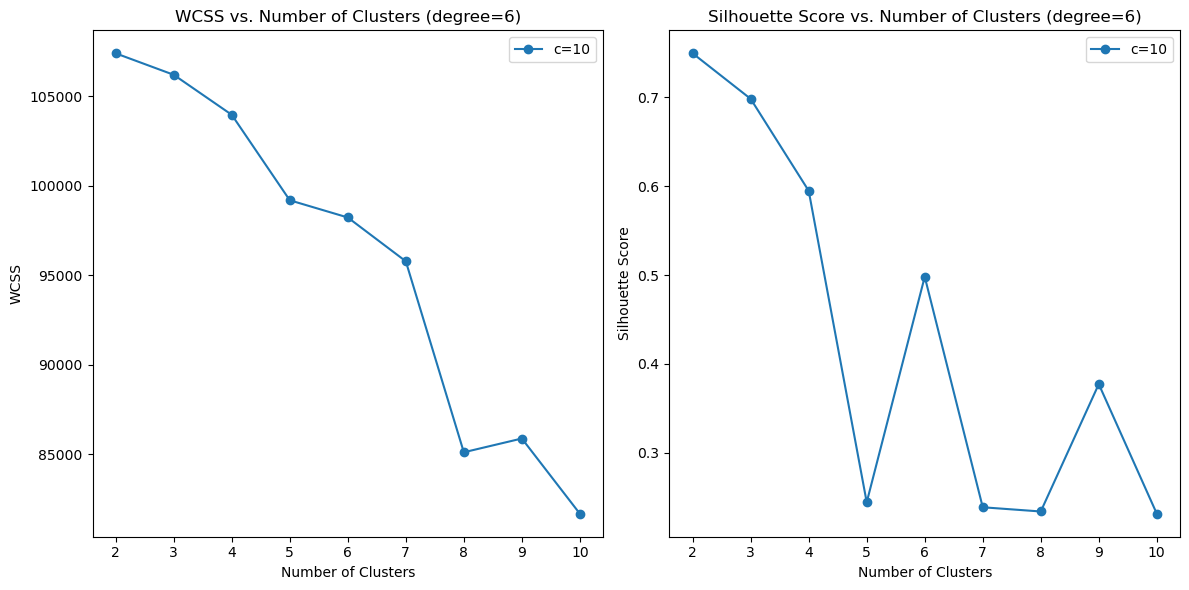

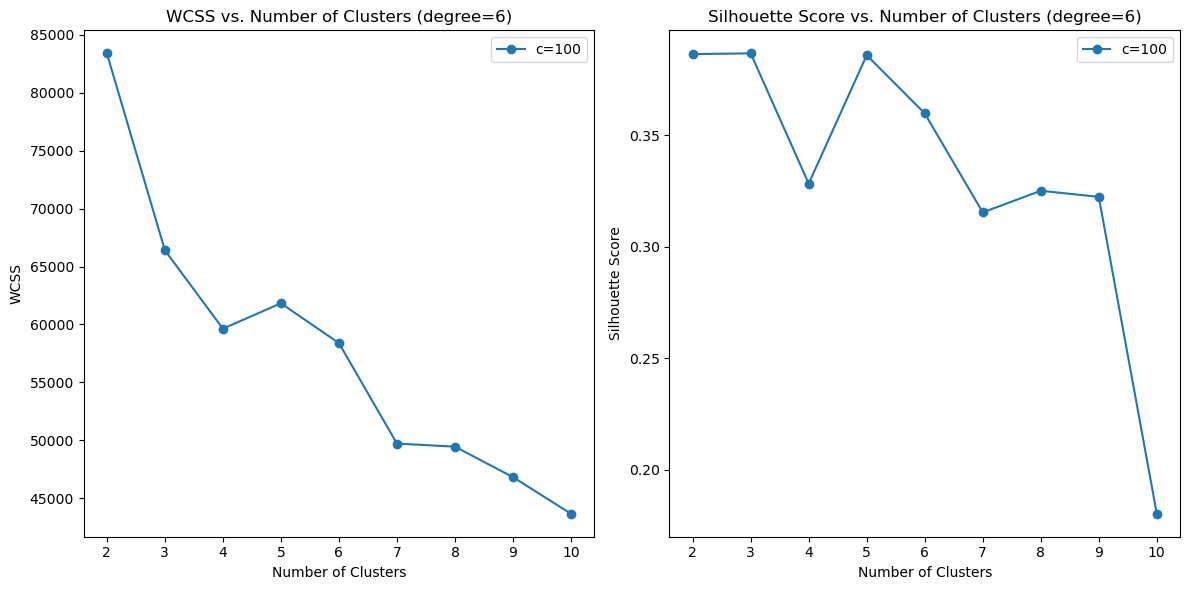

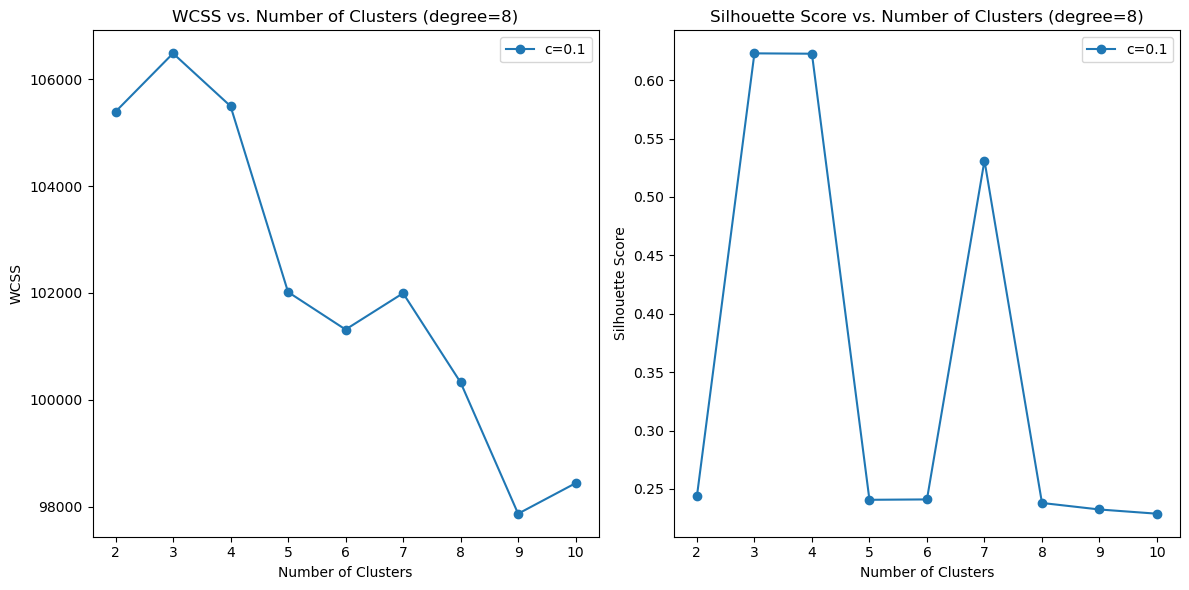

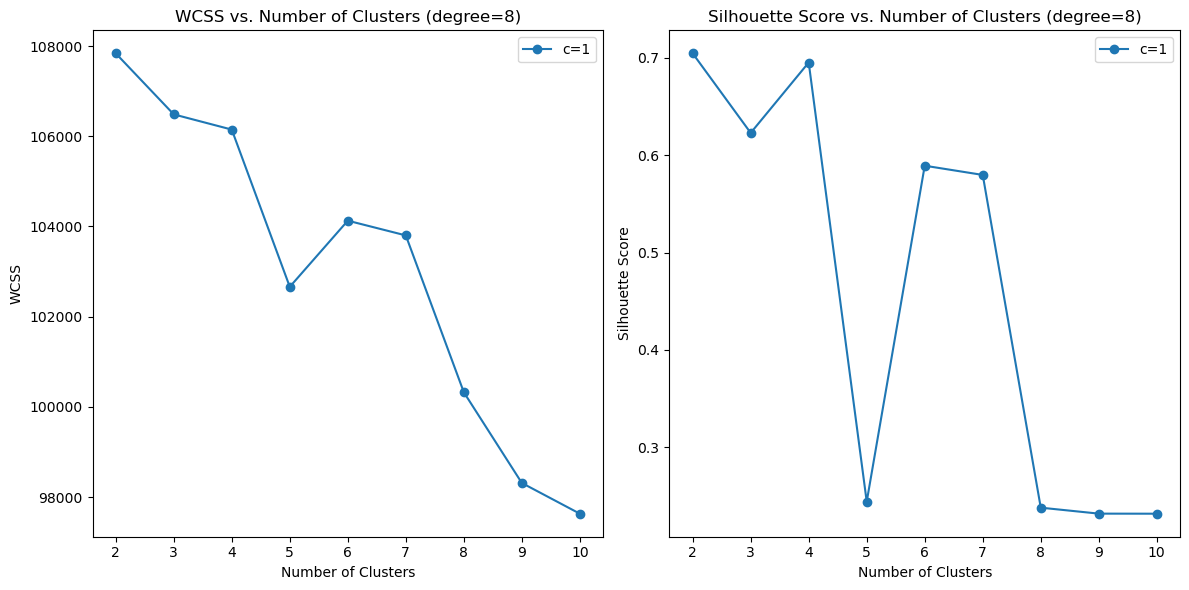

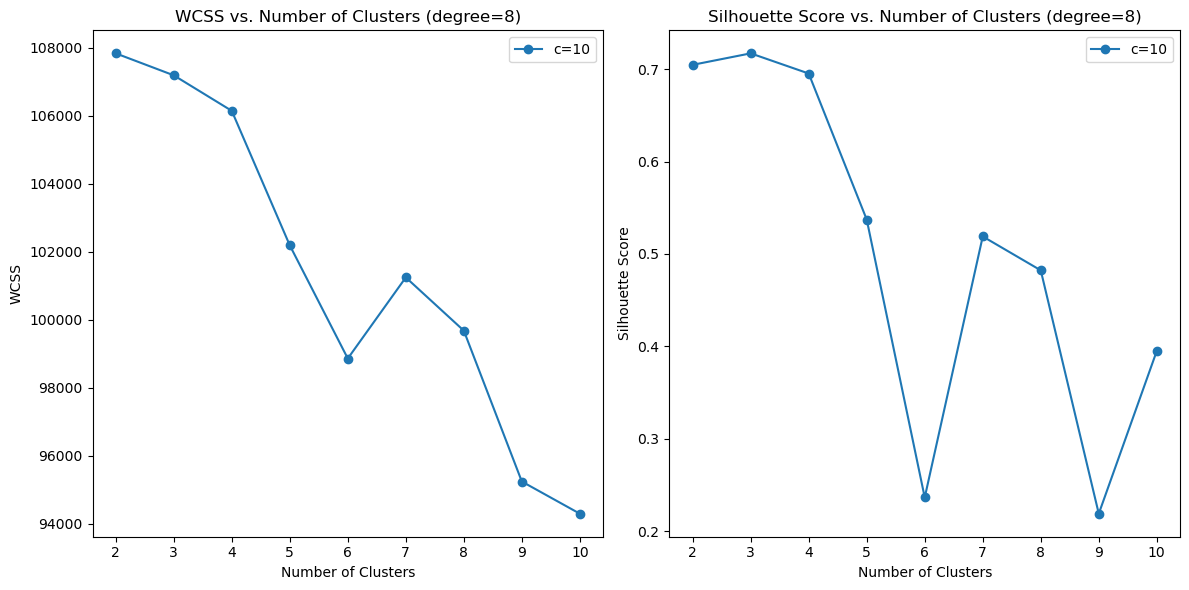

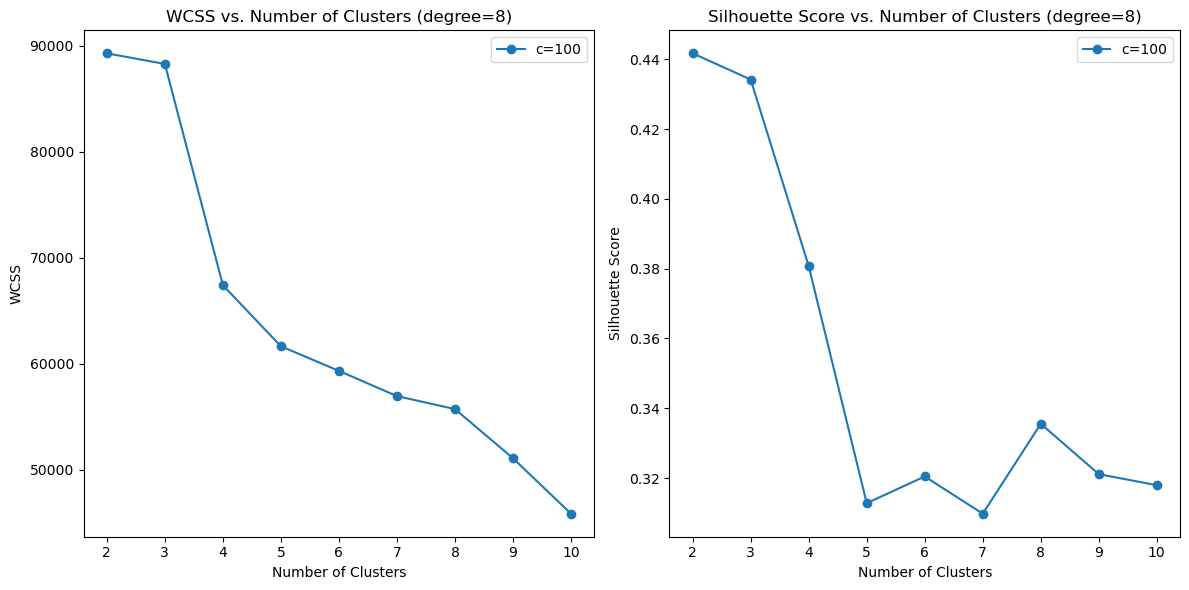

In [42]:
degrees = [2, 4, 6, 8]
cs = [0.1, 1, 10,100]

cluster_range = range(2, 11)

# Plotting WCSS and silhouette scores
for degree in degrees:
    for c in cs:
        wcss_values = []
        silhouette_values = []

        for n_clusters in cluster_range:
            model = custom_kmeans(n_clusters=n_clusters, kernel="polynomial", degree=degree, c=c)
            model.fit(X)
            labels = model._assign_labels(X)

            wcss = model.calculate_wcss(X, labels)
            silhouette = silhouette_score(X, labels)

            wcss_values.append(wcss)
            silhouette_values.append(silhouette)

        # Plot WCSS
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(cluster_range, wcss_values, marker='o', label=f'c={c}')
        plt.title(f'WCSS vs. Number of Clusters (degree={degree})')
        plt.xlabel('Number of Clusters')
        plt.ylabel('WCSS')
        plt.legend()

        # Plot Silhouette Scores
        plt.subplot(1, 2, 2)
        plt.plot(cluster_range, silhouette_values, marker='o', label=f'c={c}')
        plt.title(f'Silhouette Score vs. Number of Clusters (degree={degree})')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Silhouette Score')
        plt.legend()

        plt.tight_layout()
        plt.show()

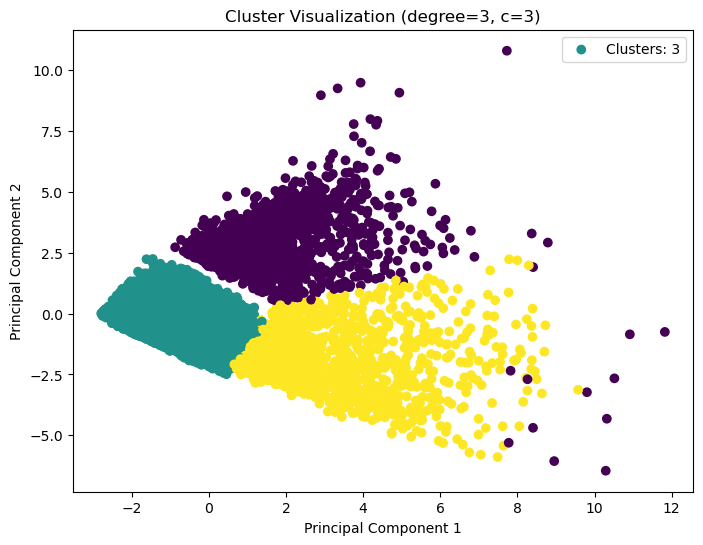

In [47]:
degrees = [2, 4, 6, 8]
cs = [0.1, 1, 10,100]
degree = 3
c = 3
cluster_range = 3
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Plotting WCSS and silhouette scores
# Plotting WCSS and silhouette scores
# for c in cs:
wcss_values = []
silhouette_values = []

# for n_clusters in cluster_range:
n_clusters = 3
model = custom_kmeans(n_clusters=n_clusters, kernel="gaussian", degree=degree, c=c)
model.fit(X)
labels = model._assign_labels(X)
X_reduced = pca.fit_transform(X)
labels = model._assign_labels(X)

wcss = model.calculate_wcss(X, labels)
silhouette = silhouette_score(X, labels)

wcss_values.append(wcss)
silhouette_values.append(silhouette)

# Plot WCSS
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', label=f'Clusters: {n_clusters}')
plt.title(f'Cluster Visualization (degree={degree}, c={c})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()



In [44]:
results["polynomial"]={"wcss":[100321.52,72954.12,69541.34,69102.63,59812.90,],"silhouette":[]}

Gaussian

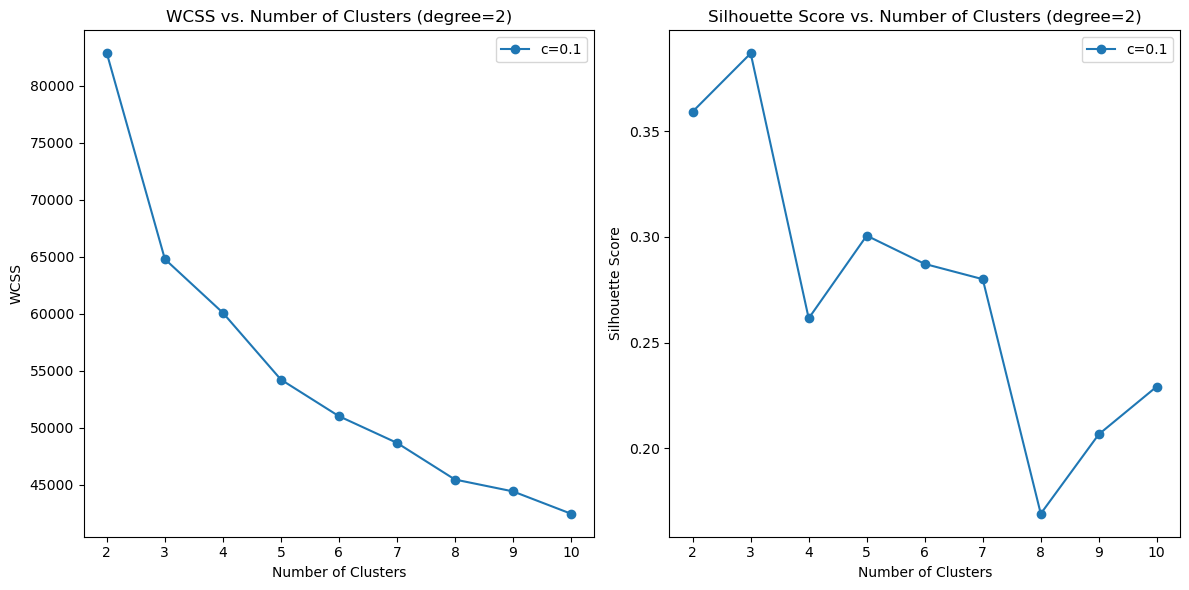

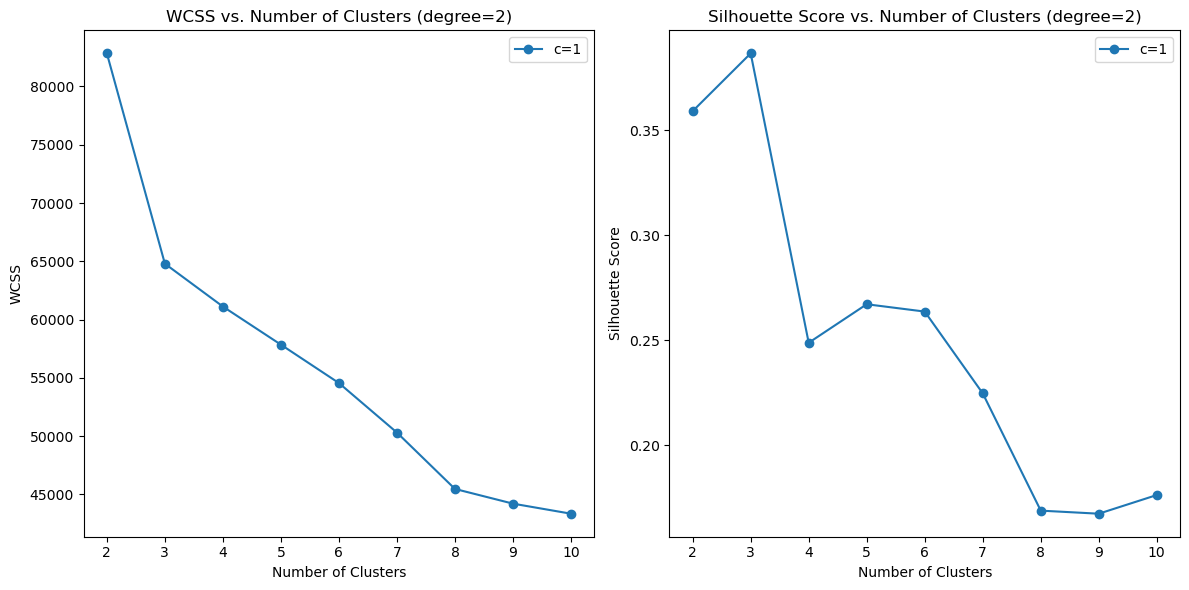

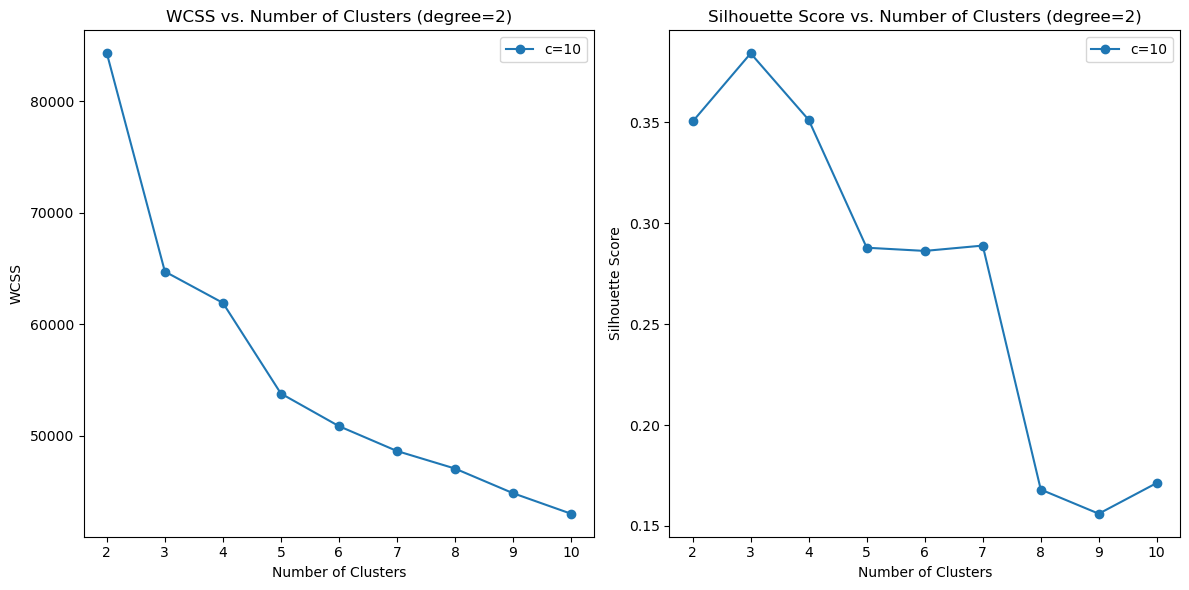

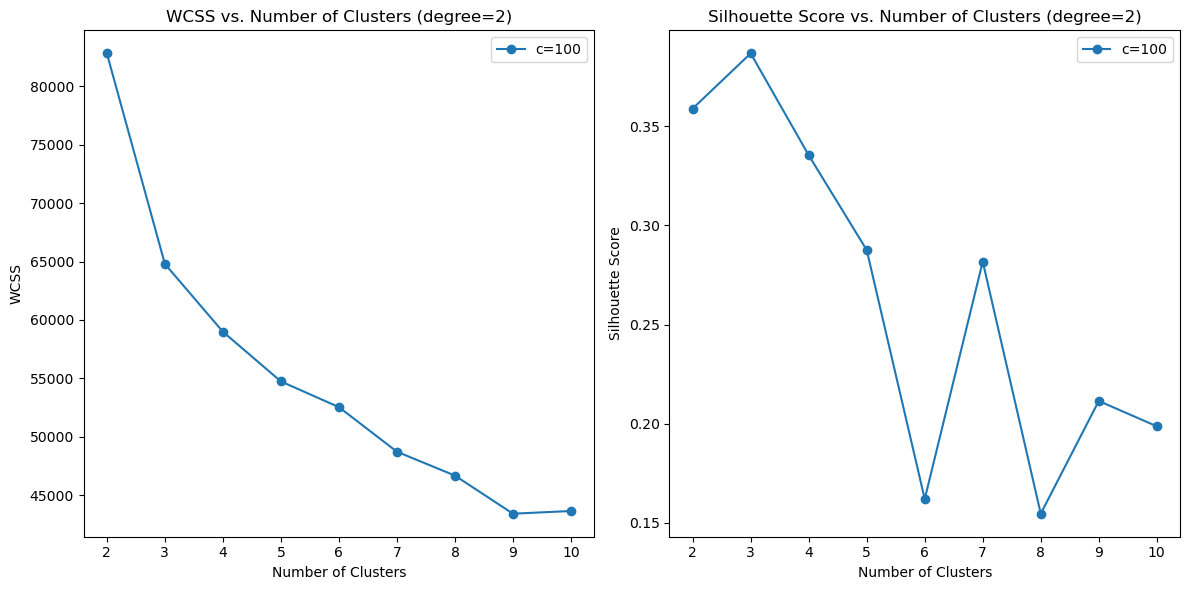

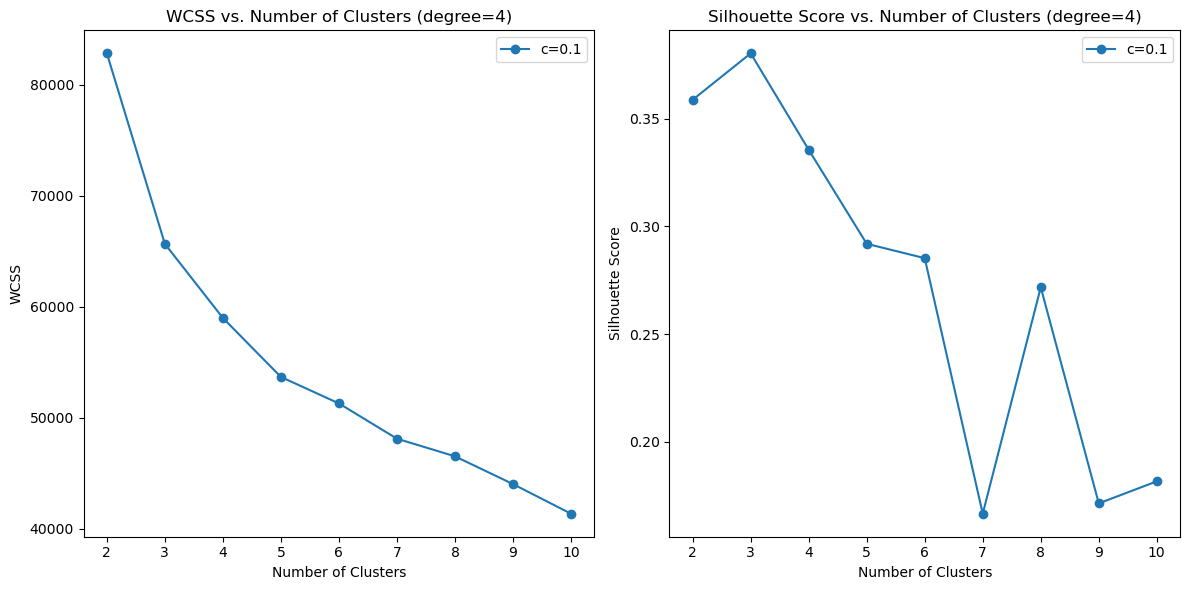

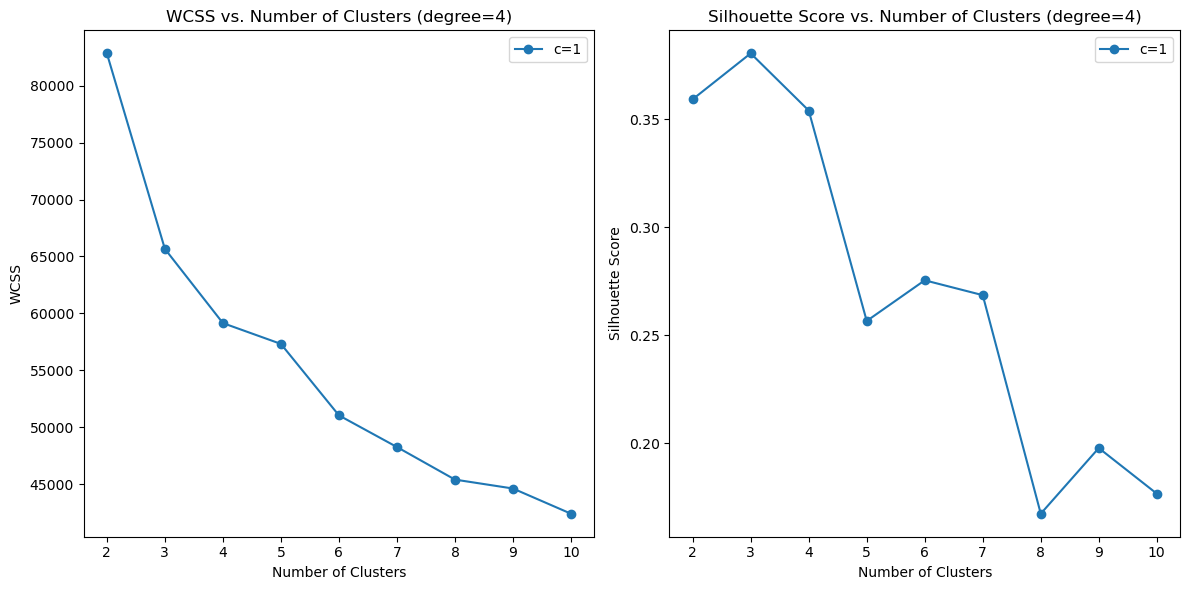

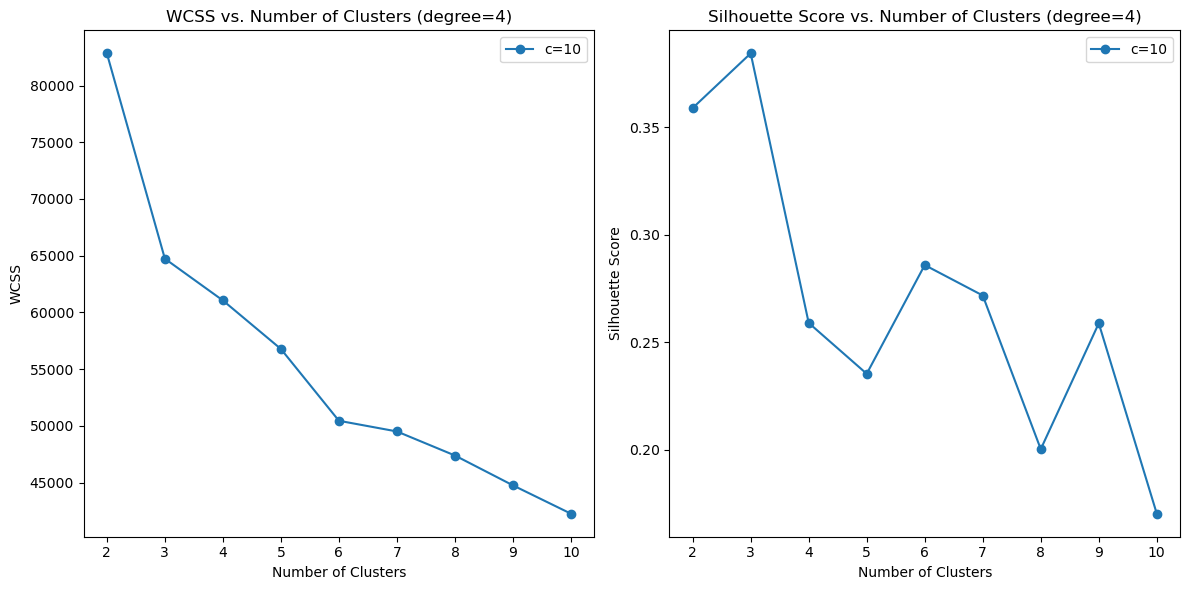

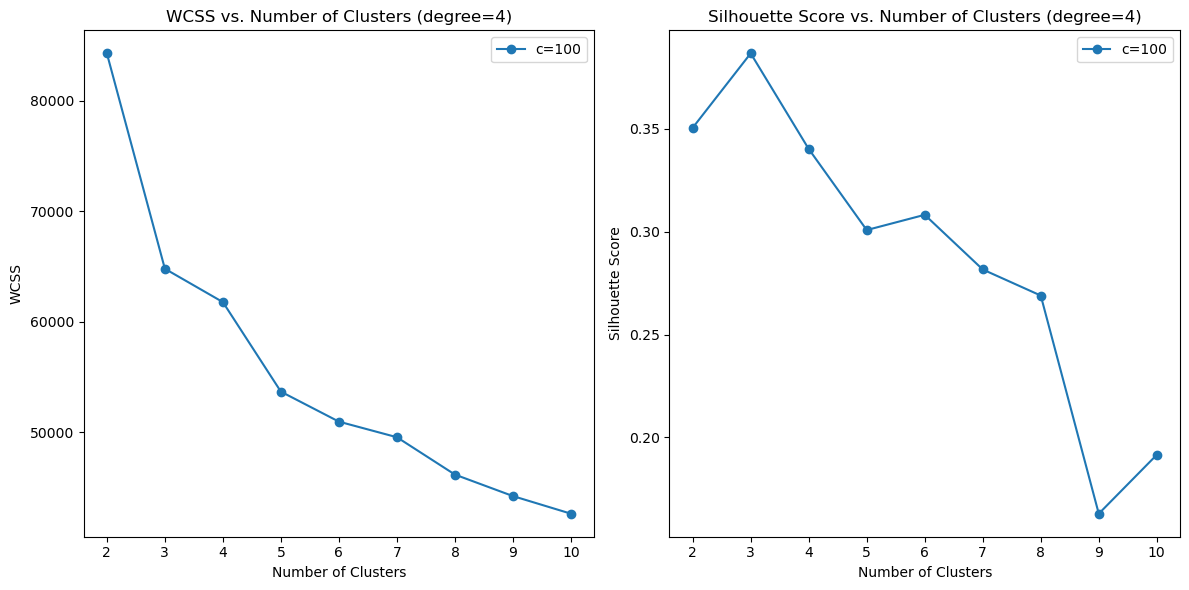

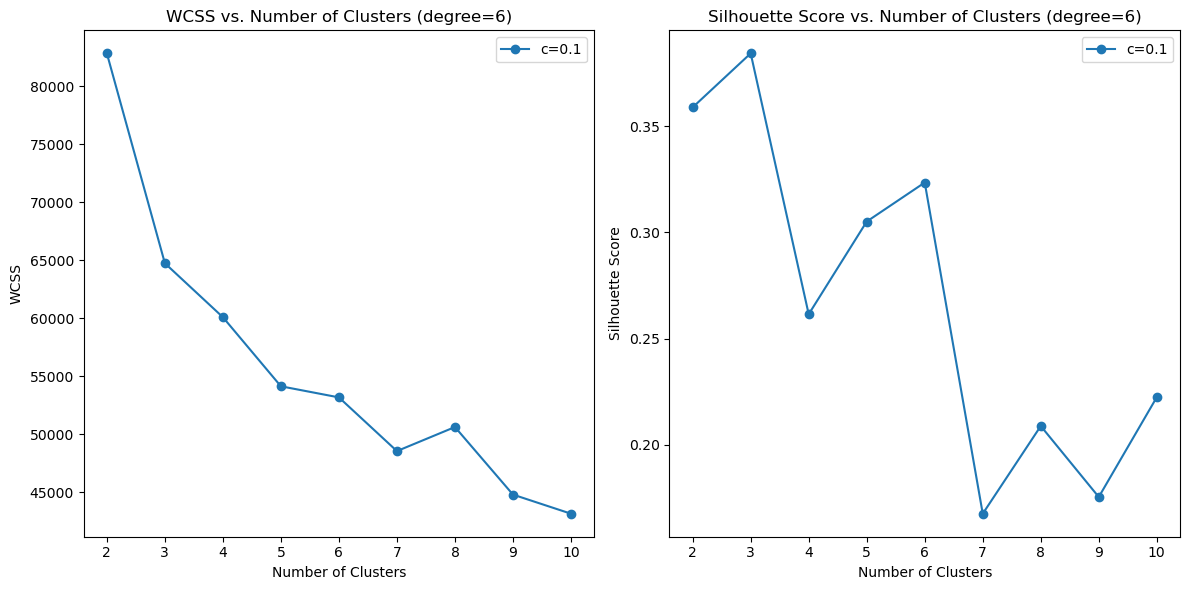

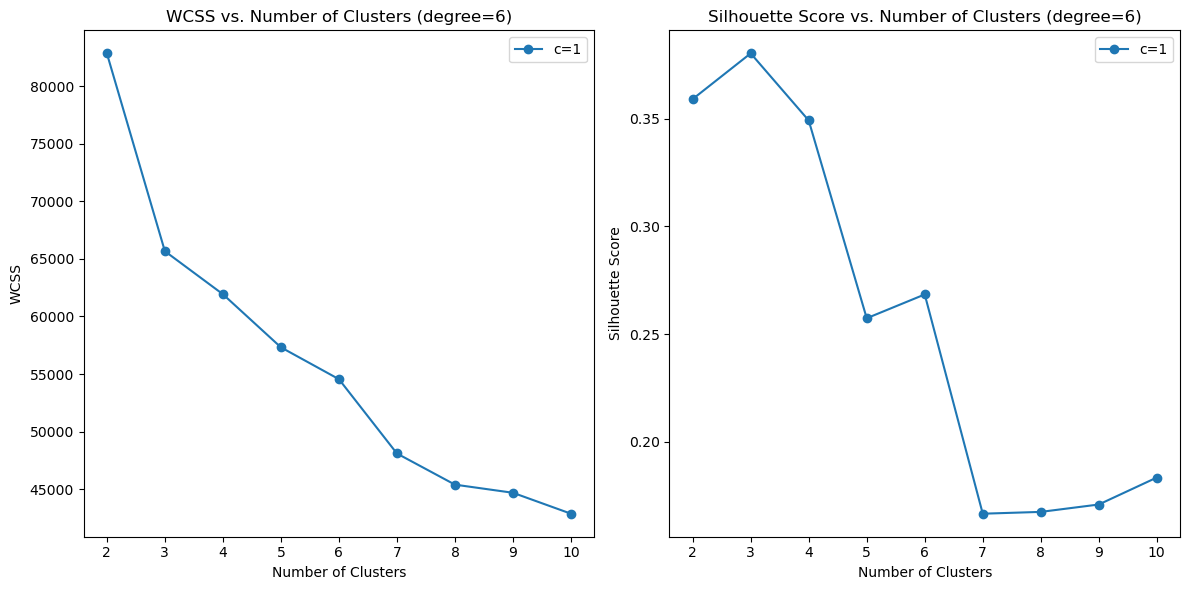

KeyboardInterrupt: 

In [45]:
degrees = [2, 4, 6, 8]
cs = [0.1, 1, 10,100]

cluster_range = range(2, 11)

# Plotting WCSS and silhouette scores
for degree in degrees:
    for c in cs:
        wcss_values = []
        silhouette_values = []

        for n_clusters in cluster_range:
            model = custom_kmeans(n_clusters=n_clusters, kernel="gaussian", degree=degree, c=c)
            model.fit(X)
            labels = model._assign_labels(X)

            wcss = model.calculate_wcss(X, labels)
            silhouette = silhouette_score(X, labels)

            wcss_values.append(wcss)
            silhouette_values.append(silhouette)

        # Plot WCSS
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(cluster_range, wcss_values, marker='o', label=f'c={c}')
        plt.title(f'WCSS vs. Number of Clusters (degree={degree})')
        plt.xlabel('Number of Clusters')
        plt.ylabel('WCSS')
        plt.legend()

        # Plot Silhouette Scores
        plt.subplot(1, 2, 2)
        plt.plot(cluster_range, silhouette_values, marker='o', label=f'c={c}')
        plt.title(f'Silhouette Score vs. Number of Clusters (degree={degree})')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Silhouette Score')
        plt.legend()

        plt.tight_layout()
        plt.show()

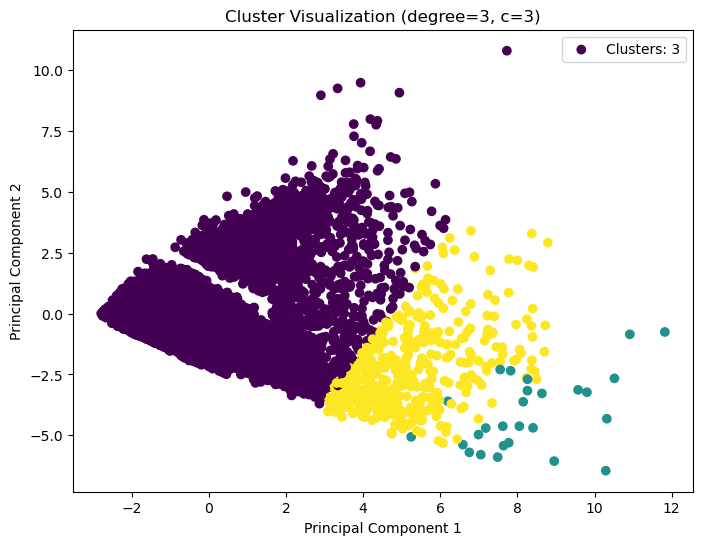

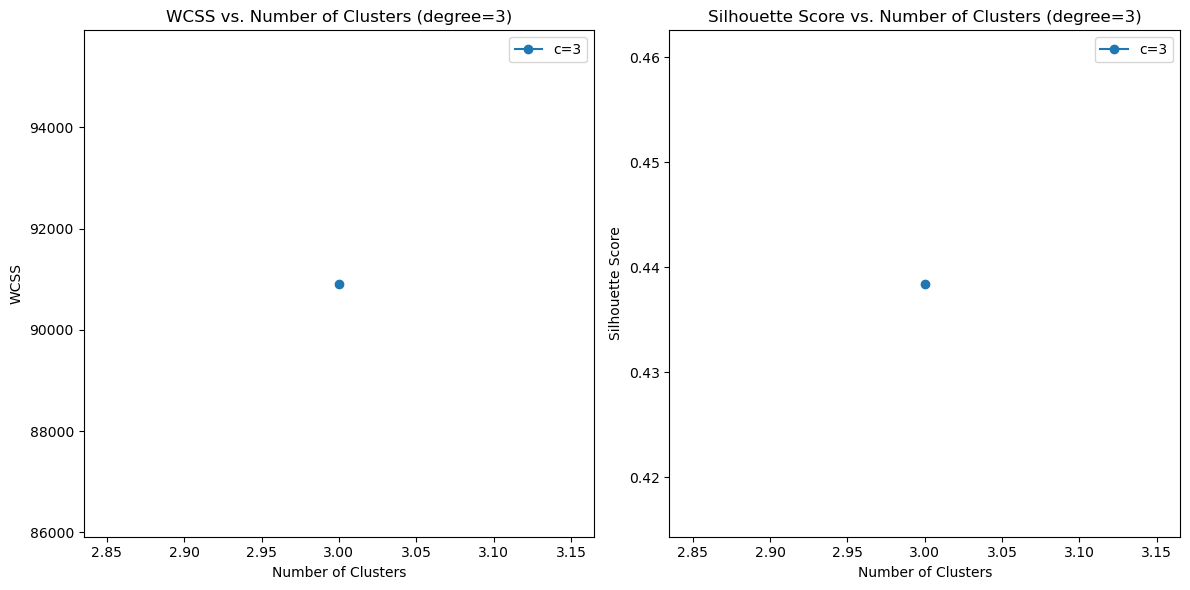

In [48]:
degrees = [2, 4, 6, 8]
cs = [0.1, 1, 10,100]
degree = 3
c = 3
cluster_range = 3
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Plotting WCSS and silhouette scores
# Plotting WCSS and silhouette scores
# for c in cs:
wcss_values = []
silhouette_values = []

# for n_clusters in cluster_range:
n_clusters = 3
model = custom_kmeans(n_clusters=n_clusters, kernel="polynomial", degree=degree, c=c)
model.fit(X)
labels = model._assign_labels(X)
X_reduced = pca.fit_transform(X)
labels = model._assign_labels(X)

wcss = model.calculate_wcss(X, labels)
silhouette = silhouette_score(X, labels)

wcss_values.append(wcss)
silhouette_values.append(silhouette)

# Plot WCSS
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', label=f'Clusters: {n_clusters}')
plt.title(f'Cluster Visualization (degree={degree}, c={c})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig("Polynomial_kernel.png")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss_values, marker='o', label=f'c={c}')
plt.title(f'WCSS vs. Number of Clusters (degree={degree})')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_values, marker='o', label=f'c={c}')
plt.title(f'Silhouette Score vs. Number of Clusters (degree={degree})')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

plt.tight_layout()
plt.show()

Tanh

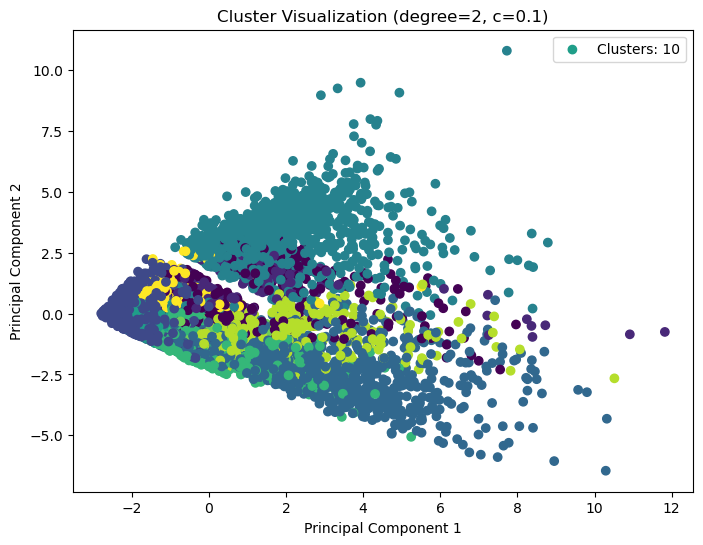

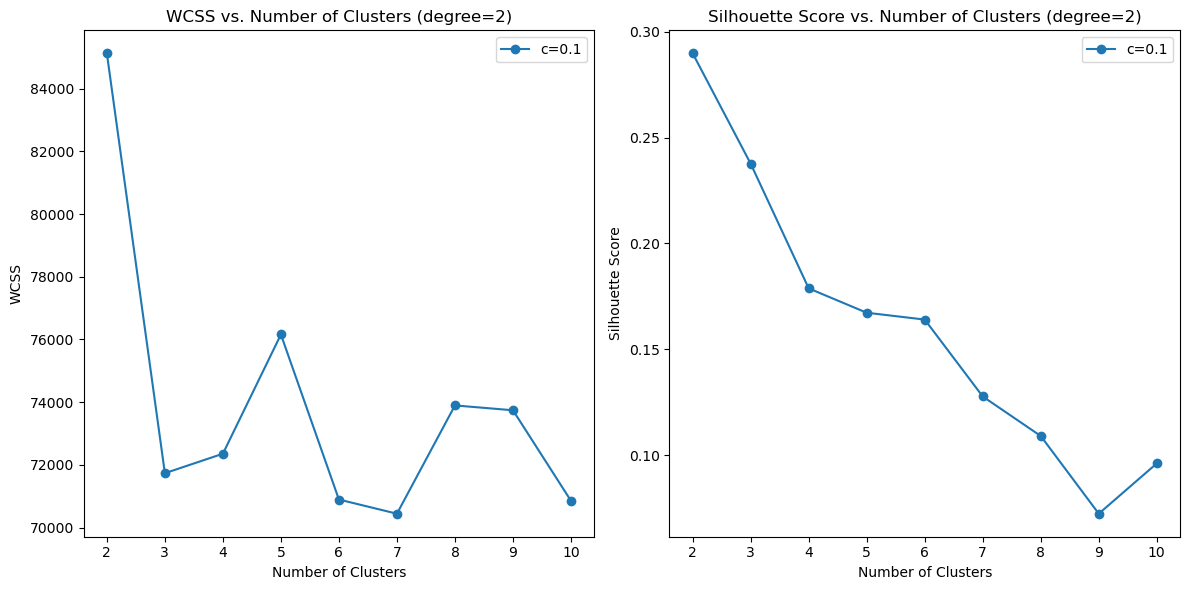

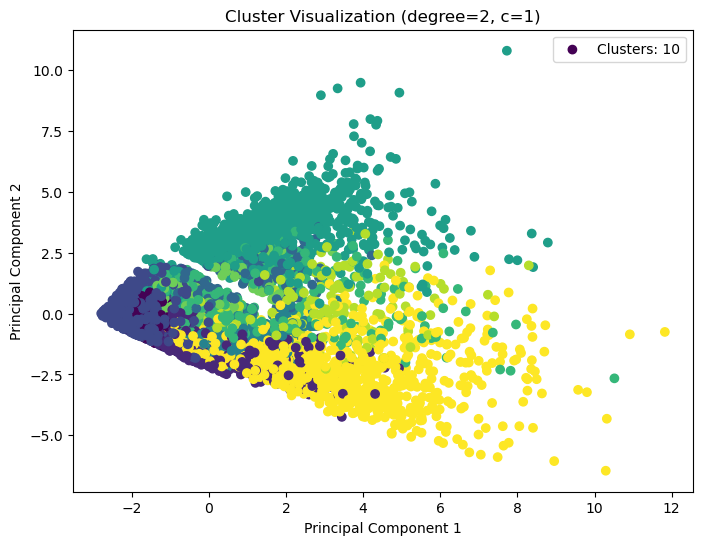

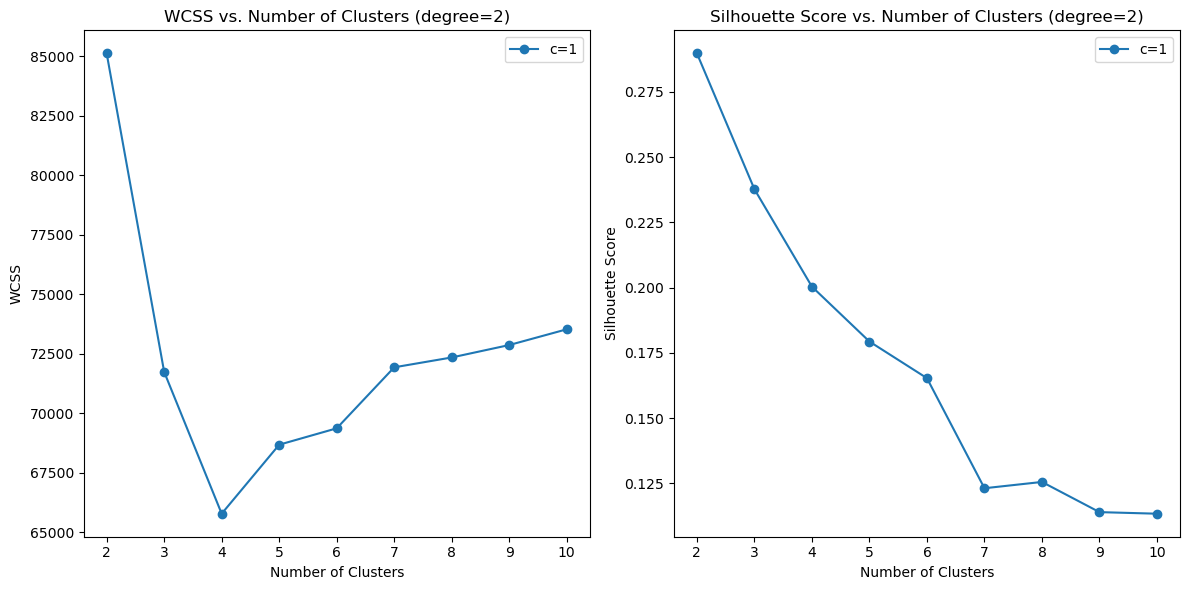

KeyboardInterrupt: 

In [46]:
degrees = [2, 4, 6, 8]
cs = [0.1, 1, 10,100]
from sklearn.decomposition import PCA
cluster_range = range(2, 11)
pca = PCA(n_components=2)
# Plotting WCSS and silhouette scores
for degree in degrees:
    for c in cs:
        wcss_values = []
        silhouette_values = []
        
        for n_clusters in cluster_range:
            model = custom_kmeans(n_clusters=n_clusters, kernel="tanh", degree=degree, c=c)
            model.fit(X)
            X_reduced = pca.fit_transform(X)
            labels = model._assign_labels(X)

            wcss = model.calculate_wcss(X, labels)
            silhouette = silhouette_score(X, labels)

            wcss_values.append(wcss)
            silhouette_values.append(silhouette)
        
        # Plot WCSS
        # Assuming 'X_reduced' is your 2D reduced data from the PCA
        plt.figure(figsize=(8, 6))
        plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', label=f'Clusters: {n_clusters}')
        plt.title(f'Cluster Visualization (degree={degree}, c={c})')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(cluster_range, wcss_values, marker='o', label=f'c={c}')
        plt.title(f'WCSS vs. Number of Clusters (degree={degree})')
        plt.xlabel('Number of Clusters')
        plt.ylabel('WCSS')
        plt.legend()

        # Plot Silhouette Scores
        plt.subplot(1, 2, 2)
        plt.plot(cluster_range, silhouette_values, marker='o', label=f'c={c}')
        plt.title(f'Silhouette Score vs. Number of Clusters (degree={degree})')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Silhouette Score')
        plt.legend()

        plt.tight_layout()
        plt.show()